# Clusterização da base de dados do ENEM de 2021 utilizando o algoritmo K-Means

**Aluno**: Rafael Victor Araujo Bernardes

## Introdução

O Exame Nacional do Ensino Médio (ENEM) foi criado durante o governo do ex-presidente Fernando Henrique Cardoso em 1998 com o intuito de avaliar anualmente o aprendizado dos alunos do ensino médio brasileiro, de acordo com as diretrizes e bases da educação nacional estabelecidas pela Lei nº 9.394, de 20 de dezembro de 1996. A partir de 2004, foram implementadas estratégias que permitiram utilizar os resultados do exame como critério de ingresso em cursos superiores. Uma das primeiras iniciativas foi o Programa Universidade para Todos, conhecido como ProUni, criado pela Lei nº 11.096. Esse programa oferece bolsas em universidades particulares para jovens que atendem a determinados critérios socioeconômicos. Posteriormente, em 2010, foi instituído o Sistema de Seleção Unificada (SISU), que possibilita o acesso a universidades públicas com base nos resultados do ENEM.

O processo de inscrição para o ENEM é realizado online e exige atenção ao preenchimento correto do cadastro e ao cumprimento dos prazos estipulados. Os candidatos devem acessar o site do Ministério da Educação (MEC) e preencher a ficha de inscrição, que inclui um questionário socioeconômico expressivamente detalhado. As informações socioeconômicas dos candidatos são armazenadas e, após a conclusão do ciclo do exame, são anonimizadas e disponibilizadas ao público. Esse procedimento é de grande relevância para a sociedade, uma vez que, de certa forma, oferece uma prévia anual dos resultados do censo demográfico realizado pelo Instituto Brasileiro de Geografia e Estatística (IBGE).

Sabendo disso, este trabalho propõe a utilização do Python para aplicar o algoritmo K-Means à base de dados do ENEM de 2021. Para isso, serão consideradas não apenas as notas dos participantes, mas também suas respostas ao questionário socioeconômico mencionado. O objetivo dessa análise é compreender as principais características dos clusters formados, de modo que essas informações possam ser utilizadas no futuro para desenvolver um exame mais alinhado à realidade de diferentes perfis de brasileiros.

### Sobre o K-Means

O algoritmo K-Means é um dos métodos mais populares de agrupamento não supervisionado em análise de dados e aprendizado de máquina. Ele é amplamente utilizado para segmentar dados em grupos (clusters) com características semelhantes, sem a necessidade de rótulos prévios.

O principal objetivo do K-Means é dividir um conjunto de dados em "K" grupos, onde cada grupo representa um cluster sendo e sendo "K" um valor definido pelo usuário antes da execução do algoritmo. O K-Means busca minimizar a soma dos quadrados das distâncias entre os pontos de dados e os centroides dos clusters.

Apesar de sua simplicidade, o K-Means é amplamente utilizado em diversas áreas, como análise de mercado, segmentação de clientes, processamento de imagens e muito mais. Em resumo, o algoritmo K-Means oferece uma abordagem eficiente e poderosa para a análise de dados não rotulados, permitindo a descoberta de padrões subjacentes e a organização dos dados em grupos significativos.

## Importação dos dados e recursos necessários

A base de dados utilizada para o desenvolvimento deste trabalho pode ser encontrada no portal do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (INEP), o órgão responsável pelo ENEM, através do link: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem.

Esses microdados contêm uma variedade de informações sobre os participantes, coletadas ao longo de todo o processo do exame. Ao realizar o download, os usuários encontrarão não apenas a própria base de dados, mas também as provas, gabaritos, informações sobre questões, notas, questionários respondidos pelos inscritos, documentos técnicos e, acima de tudo, um extenso dicionário relacionado ao conjunto de dados. Este dicionário se mostra especialmente relevante para o desenvolvimento deste trabalho.

Os microdados estão formatados como arquivos ".csv" e, apenas para o ano de 2021, contêm originalmente 3.389.832 linhas e 76 colunas. Devido à grande quantidade de colunas e à diversidade de possíveis respostas que cada coluna pode conter, torna-se inviável realizar uma caracterização completa da base neste trabalho. No entanto, todas as colunas relevantes para o desenvolvimento desta pesquisa terão seus significados explorados em momentos oportunos.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from category_encoders.one_hot import OneHotEncoder, OrdinalEncoder
from sklearn.cluster import KMeans

In [2]:
DATASET_ENEM_PATH = 'D:\Rafael\Projects\IFMG_TCC_ENEM\Datasets\MICRODADOS_ENEM_2021.csv'

In [3]:
microdadosEnem = pd.read_csv(DATASET_ENEM_PATH, sep=';', encoding='ISO-8859-1')

## Análise exploratória dos dados.

O objetivo principal desta análise exploratória dos dados é entender e extrair _insights_ iniciais sobre os microdados por meio da observação de padrões, tendências, relações e anomalias. Segue abaixo um compilado das etapas que segui:

In [4]:
# Contato inicial com a base

microdadosEnem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [5]:
# Visualizando as dimensões da base

microdadosEnem.shape

(3389832, 76)

In [6]:
# Visualizando as colunas da base

microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

## Pré-processamento dos dados

O objetivo principal deste pré-processamento dos dados é preparar e otimizar os dados brutos para análise ou modelagem, visando melhorar a qualidade, a eficácia e a eficiência das etapas subsequentes.

### Eliminando características individuais, de baixa variância ou inexpressivas.

Por meio do dicionário de dados, sabe-se que as colunas abaixo possuem pouca relevância para o objetivo da análise. Isto porque algumas delas possuem variância igual a zero (como é o caso da coluna "NU_ANO" que estará sempre preenchida com 2021) e outras representam caracteristicas altamente individuais dos candidatos e, portanto, não são aptas para avaliação de nenhum tipo de tendência (como é o caso das colunas com prefixo "TX_" que são os vetores com as respostas objetivas para as diferentes áreas de conhecimento da prova de cada candidato). Há ainda um conjunto de colunas inexpressivas que tratam sobre a cor de prova do participante. Todas elas serão removidas.

* "NU_INSCRICAO",
* "NU_ANO",
* "TX_RESPOSTAS_CN",
* "TX_RESPOSTAS_CH",
* "TX_RESPOSTAS_LC",
* "TX_RESPOSTAS_MT",
* "TX_GABARITO_CN",
* "TX_GABARITO_CH",
* "TX_GABARITO_LC",
* "TX_GABARITO_MT",
* "CO_PROVA_CN",
* "CO_PROVA_CH",
* "CO_PROVA_LC"
* "CO_PROVA_MT"


In [7]:
microdadosEnem.drop(columns=[
    'NU_INSCRICAO',
    'NU_ANO',
    'TX_RESPOSTAS_CN',
    'TX_RESPOSTAS_CH',
    'TX_RESPOSTAS_LC',
    'TX_RESPOSTAS_MT',
    'TX_GABARITO_CN',
    'TX_GABARITO_CH',
    'TX_GABARITO_LC',
    'TX_GABARITO_MT',
    'CO_PROVA_CN',
    'CO_PROVA_CH',
    'CO_PROVA_LC',
    'CO_PROVA_MT'
], inplace=True)

microdadosEnem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,5,F,1,1,1,1,3,1,NaN,0,...,A,A,A,B,A,A,B,A,B,B
1,12,M,1,1,1,1,11,1,NaN,0,...,A,A,A,B,A,A,C,A,A,A
2,13,F,3,1,1,1,15,1,NaN,0,...,B,A,A,B,A,A,C,B,B,B
3,3,M,1,3,1,2,0,2,1.0,0,...,A,A,A,B,A,A,B,A,B,B
4,2,F,1,3,1,2,0,2,1.0,0,...,B,A,A,B,A,B,E,A,B,B


### Eliminando redundâncias

Além disso, irei eliminar colunas redundantes.

Exemplo: "NO_MUNICIPIO_RESIDENCIA" (nome do município) equivalente a "CO_MUNICIPIO_RESIDENCIA" (código do município).

In [8]:
microdadosEnem.drop(columns=[
    'NO_MUNICIPIO_ESC','CO_UF_ESC','SG_UF_ESC', # Todas estas colunas são iguais à CO_MUNICIPIO_ESC
    'NO_MUNICIPIO_PROVA','CO_UF_PROVA','SG_UF_PROVA', # Todas estas colunas são iguais à CO_MUNICIPIO_PROVA
], inplace=True)

microdadosEnem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,5,F,1,1,1,1,3,1,NaN,0,...,A,A,A,B,A,A,B,A,B,B
1,12,M,1,1,1,1,11,1,NaN,0,...,A,A,A,B,A,A,C,A,A,A
2,13,F,3,1,1,1,15,1,NaN,0,...,B,A,A,B,A,A,C,B,B,B
3,3,M,1,3,1,2,0,2,1.0,0,...,A,A,A,B,A,A,B,A,B,B
4,2,F,1,3,1,2,0,2,1.0,0,...,B,A,A,B,A,B,E,A,B,B


### Tratamento de dados faltantes

In [9]:
# Verificando se existem valores nulos

microdadosEnem.isnull().values.any()

True

Como é possível observar nos resultados anteriores, o conjunto de dados está repleto de valores nulos. Para lidar com essa situação, uma abordagem possível seria remover todas as linhas que contenham quaisquer valores nulos, resultando em um conjunto final apenas com linhas que possuam todas as colunas preenchidas.

Entretanto, ao analisar o impacto dessa decisão, percebe-se que essa abordagem levaria à perda de mais de 70% dos registros presentes em nossa base de dados atual. Como exemplo ilustrativo, podemos notar que há mais de 2.5 milhões de linhas não preenchidas na coluna 'CO_MUNICIPIO_ESC' (Código do município da escola).

Portanto, essa alternativa se mostra inviável, e será necessário adotar estratégias específicas para tratar cada coluna que contém valores nulos.

Conforme evidenciado anteriormente, as colunas que possuem valores nulos são:

In [10]:
# Verificando onde estão os valores nulos

microdadosEnem.isnull().sum()

TP_FAIXA_ETARIA                 0
TP_SEXO                         0
TP_ESTADO_CIVIL                 0
TP_COR_RACA                     0
TP_NACIONALIDADE                0
TP_ST_CONCLUSAO                 0
TP_ANO_CONCLUIU                 0
TP_ESCOLA                       0
TP_ENSINO                 2293004
IN_TREINEIRO                    0
CO_MUNICIPIO_ESC          2576026
TP_DEPENDENCIA_ADM_ESC    2576026
TP_LOCALIZACAO_ESC        2576026
TP_SIT_FUNC_ESC           2576026
CO_MUNICIPIO_PROVA              0
TP_PRESENCA_CN                  0
TP_PRESENCA_CH                  0
TP_PRESENCA_LC                  0
TP_PRESENCA_MT                  0
NU_NOTA_CN                1143988
NU_NOTA_CH                1011453
NU_NOTA_LC                1011453
NU_NOTA_MT                1143988
TP_LINGUA                       0
TP_STATUS_REDACAO         1011453
NU_NOTA_COMP1             1011453
NU_NOTA_COMP2             1011453
NU_NOTA_COMP3             1011453
NU_NOTA_COMP4             1011453
NU_NOTA_COMP5 

##### ESTRATÉGIAS:

1. É possivel observar que há uma quantidade significativa de registros com informações ausentes relacionadas à escola do candidato. São elas:

    * "CO_MUNICIPIO_ESC" (Código do município da escola);
    * "TP_DEPENDENCIA_ADM_ESC" (Dependência administrativa da escola);
    * "TP_LOCALIZACAO_ESC" (Tipo de localização da escola); 
    * "TP_SIT_FUNC_ESC" (Situação de funcionamento da escola);
    * "TP_ENSINO" (Tipo de instituição de ensino);
    
Dado que aproximadamente 75% das linhas da tabela não possuem esses valores preenchidos, vou optar por remover essas colunas do modelo, pois não será possivel utiliza-las como objeto de ánalise confiável e nem fazer nenhum outro tipo de inferência preditiva ou classificativa.

In [11]:
# Removendo as colunas não confiáveis

microdadosEnem.drop(columns=[
    'CO_MUNICIPIO_ESC',
    'TP_DEPENDENCIA_ADM_ESC',
    'TP_LOCALIZACAO_ESC',
    'TP_SIT_FUNC_ESC',
    'TP_ENSINO'
], inplace=True)

2. As colunas relacionadas as notas dos participantes devem possuir registros vazios devido a ausência do candidato no dia de aplicação do exame. Desta forma, vou optar por prosseguir apenas com os participantes presentes nos dois dias de aplicação da prova. Ao optar por isto, estarei reduzindo minha quantidade de registros, mas poderei também descartar as colunas relacionadas a presença e simplificar meu modelo.

Uma sugestão de trabalho para o futuro é fazer a analise justamente destas linhas que estou desconsiderando.

In [12]:
# Removendo participantes ausêntes por meio da análise das notas

microdadosEnem.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'], inplace=True)

In [13]:
# Validando se realmente posso remover as colunas de presença por meio da análise de variância.

colunasDePresença = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']
microdadosEnem[colunasDePresença].var()

TP_PRESENCA_CN    0.0
TP_PRESENCA_CH    0.0
TP_PRESENCA_LC    0.0
TP_PRESENCA_MT    0.0
dtype: float64

In [14]:
# Dado que a hipotese foi validada, posso remover as colunas de presença para simplificar meu modelo

microdadosEnem.drop(columns=colunasDePresença, inplace=True)

3. Poucos registros não possuem os campos de Q001 a Q025 preenchidos. Esses registros serão desconsiderados.

In [15]:
microdadosEnem.dropna(subset=['Q001'], inplace=True)

##### REAVALIAÇÃO DA CONSISTÊNCIA DOS DADOS:

Se tudo tiver ocorrido conforme o planejado, não devem ter mais dados nulos na tabela

In [16]:
microdadosEnem.isna().sum().sum()

0

##### ANÁLISE DOS GANHOS

Seguindo estas abordagens, foram resolvidos todos dos problemas com dados nulos e mantivemos 2.238.106 registros para realização das próximas analises. Ou seja, ao invés de descartar cerca de 2.5 milhões de linhas, consegui reduzir este número para 1.1 milhão, preservando mais de 1 milhão de dados.

Segue abaixo a comprovação.

In [17]:
microdadosEnem.shape

(2238106, 47)

### Tratando variáveis categóricas

Necessário para que o K-Means funcione corretamente

In [18]:
microdadosEnem.select_dtypes(include='object').describe()

,TP_SEXO,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,2238106,2238106,2238106,2238106,2238106,2238106,2238106,2238106,2238106,2238106,...,2238106,2238106,2238106,2238106,2238106,2238106,2238106,2238106,2238106,2238106
unique,2,8,8,6,6,17,4,5,5,5,...,5,5,2,5,2,2,5,2,5,2
top,F,E,E,D,B,B,A,B,C,A,...,B,A,A,B,A,A,D,A,B,B
freq,1381948,681530,795005,522352,863295,546733,2022176,1343008,1061859,1033708,...,1205352,2154648,1617349,1384848,1754598,1673806,714811,1841982,954011,2048739


#### Aplicação da técnica Get Dummies para tratar variáveis categóricas nominais

A função get_dummies do pandas é uma abordagem comum para codificar variáveis categóricas nominais em um formato numérico mais adequado para análises estatísticas e modelagem. Ao aplicar get_dummies a uma variável categórica, o pandas cria novas colunas binárias (0 ou 1) para cada categoria única presente na variável original.

Por exemplo, se você tiver uma coluna chamada "Cor" com categorias "Vermelho", "Verde" e "Azul", a função get_dummies criará três novas colunas: "Cor_Vermelho", "Cor_Verde" e "Cor_Azul". Cada linha terá um valor 1 na coluna correspondente à cor daquela linha e 0 nas outras colunas. Isso permite que as informações categóricas sejam tratadas como variáveis numéricas, facilitando a análise estatística e o uso em modelos de machine learning.

Em resumo, a função get_dummies transforma variáveis categóricas nominais em uma representação numérica que preserva as relações entre as categorias, tornando os dados mais adequados para análises quantitativas.

In [19]:
microdadosEnem = pd.get_dummies(microdadosEnem, columns=['TP_SEXO'])

#### Aplicação da técnica Ordinal Encoding para tratar variáveis categóricas ordinais

O OrdinalEncoder, por sua vez, é uma técnica utilizada para codificar variáveis categóricas ordinais em valores numéricos. Este método atribui um valor numérico único a cada categoria, preservando a ordem natural das categorias.

Por exemplo, se você tiver uma coluna chamada "Educação" com categorias "Ensino Fundamental", "Ensino Médio" e "Graduação", o OrdinalEncoder atribuirá os valores 0, 1 e 2, respectivamente, para essas categorias.

A principal diferença entre o OrdinalEncoder e o get_dummies é que o primeiro é mais adequado para variáveis categóricas ordinais, onde a ordem das categorias possui um significado específico. Já o get_dummies é mais apropriado para variáveis categóricas nominais, onde não existe uma ordem intrínseca entre as categorias.

In [20]:
ordinalEncoder = OrdinalEncoder()

colunas_ordinais = [
    'Q001', 'Q002', 'Q003', 'Q004', 'Q006', # 'Q005'
    'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
    'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
    'Q023', 'Q024', 'Q025'
]

microdadosEnem[colunas_ordinais] = ordinalEncoder.fit_transform(microdadosEnem[colunas_ordinais])

Em resumo, o OrdinalEncoder codifica variáveis categóricas ordinais em valores numéricos, enquanto o get_dummies cria colunas binárias para cada categoria única em variáveis categóricas nominais. A escolha entre essas técnicas depende da natureza das variáveis e do contexto da análise.

In [21]:
microdadosEnem.head()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_MUNICIPIO_PROVA,NU_NOTA_CN,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TP_SEXO_F,TP_SEXO_M
1,12,1,1,1,1,11,1,0,2704302,505.9,...,1,1,1,1,1,1,1,1,0,1
3,3,1,3,1,2,0,2,0,2304202,580.7,...,1,1,1,1,2,1,2,2,0,1
4,2,1,3,1,2,0,2,0,2300150,497.7,...,1,1,1,2,3,1,2,2,1,0
8,8,1,3,1,2,0,2,0,3106200,487.4,...,1,1,1,1,2,1,1,2,1,0
9,4,1,3,1,2,0,2,0,2927200,507.6,...,2,2,2,1,1,1,1,2,1,0


## Clusterização com K-Means

### Identificando o melhor número possivel de K`s

Utilizando o método do cotovelo (Elbow Method) para determinar o valor de K 

In [22]:
valores_k = []
inercias = []

# Percorrendo diferentes valores de k para k entre 1 e 10
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(microdadosEnem)
    
    valores_k.append(k)
    inercias.append(kmeans.inertia_)
    print(kmeans.inertia_)

2.1841286607404296e+18
8.686596954625649e+17
3.422431157790606e+17
1.8910175332801613e+17
8.716463078267509e+16
4.4283894793131576e+16
2.7451857542230624e+16
1.7753268329388166e+16
1.3185347095515362e+16


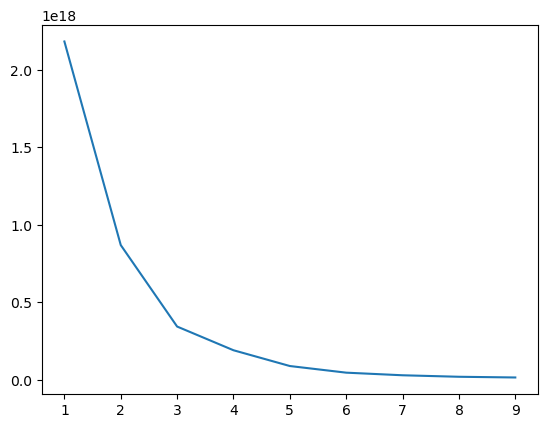

In [23]:
fig, ax = plt.subplots()

ax.plot(valores_k, inercias)

plt.show()

Pelo gráfico, é possivel perceber que K = 6 parece ser uma boa escolha dado que, após este número de clusteres, o ganho obtido por cada novo cluster não parece ser significativo.

In [24]:
# Criando meu modelo com 6 clusters

kmeans6 = KMeans(n_clusters=6, n_init=10, random_state=0).fit(microdadosEnem)

In [25]:
# Incluindo as minhas labels no meu dataset 

microdadosEnem['K-Classes'] = kmeans6.labels_
microdadosEnem.head()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_MUNICIPIO_PROVA,NU_NOTA_CN,...,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TP_SEXO_F,TP_SEXO_M,K-Classes
1,12,1,1,1,1,11,1,0,2704302,505.9,...,1,1,1,1,1,1,1,0,1,5
3,3,1,3,1,2,0,2,0,2304202,580.7,...,1,1,1,2,1,2,2,0,1,0
4,2,1,3,1,2,0,2,0,2300150,497.7,...,1,1,2,3,1,2,2,1,0,0
8,8,1,3,1,2,0,2,0,3106200,487.4,...,1,1,1,2,1,1,2,1,0,5
9,4,1,3,1,2,0,2,0,2927200,507.6,...,2,2,1,1,1,1,2,1,0,5


## Algumas análises dos clusters

### Como os clusters se comportam quanto as médias das notas das provas?

Para termos algum parâmetro de referência quanto a isto, é conveniente que de antemão saibamos a média global das provas.

In [26]:
# Média global de todos os candidatos

print("Média global em Redação: ", microdadosEnem['NU_NOTA_REDACAO'].mean())
print("Média global em Matemática: ", microdadosEnem['NU_NOTA_MT'].mean())
print("Média global em Liguagens: ", microdadosEnem['NU_NOTA_LC'].mean())
print("Média global em Humanas: ", microdadosEnem['NU_NOTA_CH'].mean())
print("Média global em Ciências: ", microdadosEnem['NU_NOTA_CN'].mean())

Média global em Redação:  622.5462422244523
Média global em Matemática:  535.197103399035
Média global em Liguagens:  504.87528579968915
Média global em Humanas:  523.1820895435692
Média global em Ciências:  491.90101536745783


In [27]:
# Média por cluster em Redação

microdadosEnem.groupby('K-Classes')['NU_NOTA_REDACAO'].mean()

K-Classes
0    609.990407
1    623.595354
2    639.803116
3    588.615566
4    618.582851
5    635.144864
Name: NU_NOTA_REDACAO, dtype: float64

In [28]:
# Média por cluster em Matemática

microdadosEnem.groupby('K-Classes')['NU_NOTA_MT'].mean()

K-Classes
0    517.645408
1    551.560628
2    562.481319
3    495.375241
4    532.588791
5    537.813124
Name: NU_NOTA_MT, dtype: float64

In [29]:
# Média por cluster em Liguagens

microdadosEnem.groupby('K-Classes')['NU_NOTA_LC'].mean()

K-Classes
0    488.976258
1    518.425199
2    527.661032
3    476.608337
4    504.808274
5    505.377166
Name: NU_NOTA_LC, dtype: float64

In [30]:
# Média por cluster em Humanas

microdadosEnem.groupby('K-Classes')['NU_NOTA_CH'].mean()

K-Classes
0    505.376277
1    538.733205
2    545.469371
3    496.312040
4    522.591932
5    524.777546
Name: NU_NOTA_CH, dtype: float64

In [31]:
# Média por cluster em Ciências

microdadosEnem.groupby('K-Classes')['NU_NOTA_CN'].mean()

K-Classes
0    477.692686
1    504.744474
2    509.081040
3    468.843133
4    491.876535
5    494.129305
Name: NU_NOTA_CN, dtype: float64

#### Conclusões 1

ESCALA = Pior < Não muito bom < Regular < Ótimo < Melhor

CLUSTER 0
* Não são tão bons em Redação
* Não são tão bons em Matemática
* Não são tão bons em Liguagens
* Não são tão bons em Humanas
* Não são tão bons em Ciências
	
CLUSTER 1
* Possuem desempelho regular em Redação
* Possuem um ótimo desempelho em Matemática
* Possuem um ótimo desempelho em Liguagens
* Possuem um ótimo desempelho em Humanas
* Possuem um ótimo desempelho em Ciências
	
CLUSTER 2
* Possuem a melhor média em Redação
* Possuem a melhor média em Matemática
* Possuem a melhor média em Liguagens
* Possuem a melhor média em Humanas
* Possuem a melhor média em Ciências

CLUSTER 3
* Possuem a pior média em Redação
* Possuem a pior média em Matemática
* Possuem a pior média em Liguagens
* Possuem a pior média em Humanas
* Possuem a pior média em Ciências

CLUSTER 4
* Possuem desempelho regular em Redação
* Possuem desempelho regular em Matemática
* Possuem desempelho regular em Liguagens
* Possuem desempelho regular em Humanas
* Possuem desempelho regular em Ciências

CLUSTER 5
* Possuem um ótimo desempelho em Redação
* Possuem desempelho regular em Matemática
* Possuem desempelho regular em Liguagens
* Possuem desempelho regular em Humanas
* Possuem desempelho regular em Ciências

---------------------------

RESUMO

CLUSTER 0
* Composto por candidatos que não foram bem em nenhuma prova quando comparados com a média global
	
CLUSTER 1
* Composto por candidatos que possuem um ótimo desempenho em todas as provas quando comparados com a média global
	
CLUSTER 2
* Composto por candidatos que possuem a melhor média em todas as provas quando comparados com a média global

CLUSTER 3
* Composto por candidatos que possuem a pior média em todas as provas quando comparados com a média global

CLUSTER 4
* Composto pelos candidatos mais medianos quando comparados com a média global

CLUSTER 5
* Composto pelos candidatos que vão muito bem em redação e não tão bem nas demais provas quando comparados com a média global

### Como as pessoas estão distribuidas dentro dos clusters?

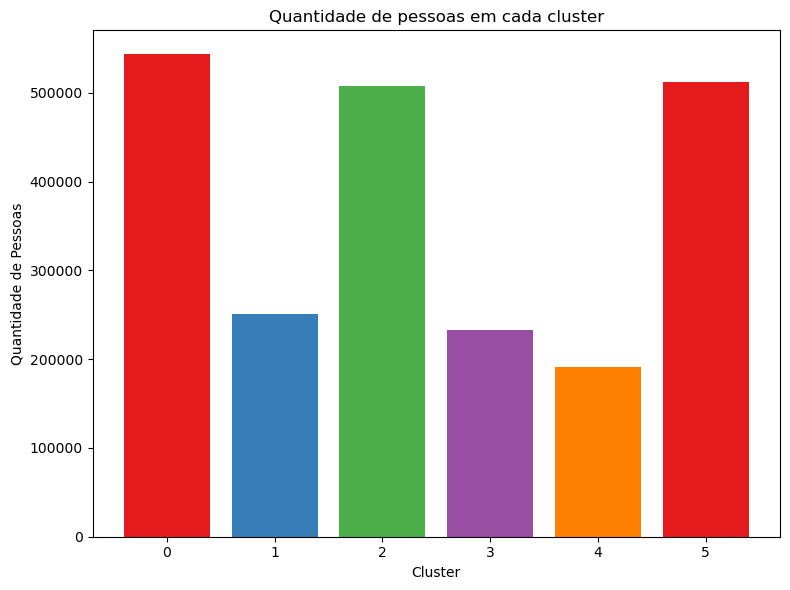

In [32]:
# Contar a quantidade de pessoas em cada cluster

cluster_counts = microdadosEnem['K-Classes'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color=sns.color_palette("Set1", n_colors=5))
plt.title("Quantidade de pessoas em cada cluster")
plt.xlabel("Cluster")
plt.ylabel("Quantidade de Pessoas")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

### Como os clusters se comportam quanto a distribuição das faixas etárias?

In [33]:
dicionarioFaixaEtaria = { 
    1: 'Menor de 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: 'Entre 26 e 30 anos',
    12: 'Entre 31 e 35 anos',
    13: 'Entre 36 e 40 anos',
    14: 'Entre 41 e 45 anos',
    15: 'Entre 46 e 50 anos',
    16: 'Entre 51 e 55 anos',
    17: 'Entre 56 e 60 anos',
    18: 'Entre 61 e 65 anos',
    19: 'Entre 66 e 70 anos',
    20: 'Maior de 70 anos'
}

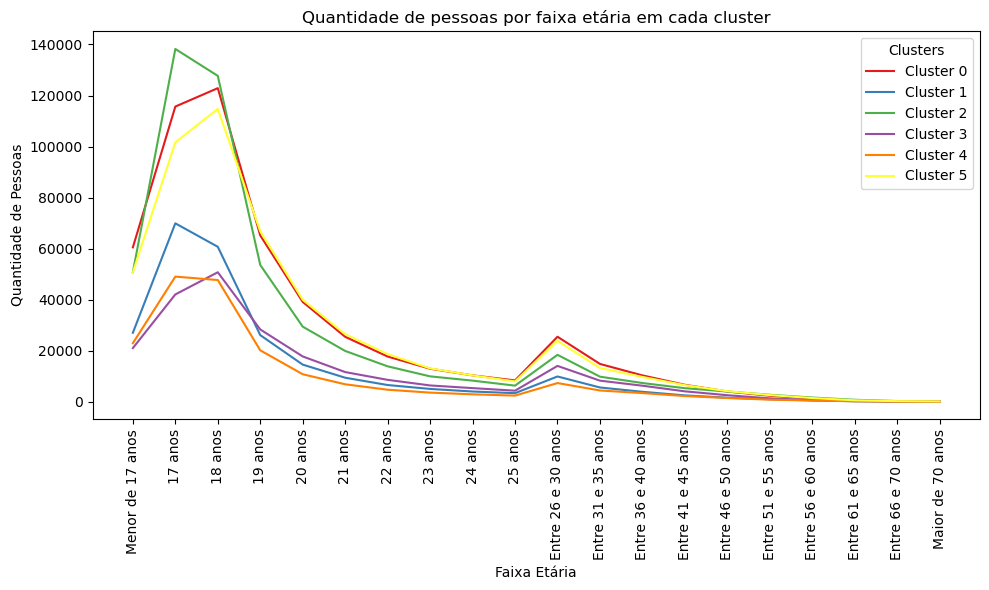

In [34]:
cluster_colors = sns.color_palette("Set1", n_colors=6)

plt.figure(figsize=(10, 6))
plt.title("Quantidade de pessoas por faixa etária em cada cluster")
plt.xlabel("Faixa Etária")
plt.ylabel("Quantidade de Pessoas")

for cluster in range(0, 6):
    cluster_atual = microdadosEnem[microdadosEnem['K-Classes'] == cluster].copy()
    cluster_atual['TP_FAIXA_ETARIA'] = cluster_atual['TP_FAIXA_ETARIA'].map(dicionarioFaixaEtaria)
    faixa_etaria = cluster_atual['TP_FAIXA_ETARIA'].value_counts()

    faixa_etaria_ordered = faixa_etaria.reindex(dicionarioFaixaEtaria.values())

    sns.lineplot(x=faixa_etaria_ordered.index, y=faixa_etaria_ordered.values, color=cluster_colors[cluster], label=f'Cluster {cluster}')
    
plt.xticks(rotation=90)
plt.tight_layout()

plt.legend(title="Clusters", loc='upper right')

plt.show()

#### Conclusões 2

CLUSTER 0
* Composto por candidatos que não foram bem em nenhuma prova quando comparados com a média global.
* Maior número de participantes se encaixa neste grupo.
* Esse grupo contém muitos jovens de 17 e 18 anos. No entanto, ele se diferencia por conter maior parte das pessoas que estão buscando uma segunda graduação.
	
CLUSTER 1
* Composto por candidatos que possuem um ótimo desempenho em todas as provas quando comparados com a média global.
* Composto por um grupo restrito de pessoas.
* Há mais jovens de 17 anos neste grupo do que jovens de 18.
	
CLUSTER 2
* Composto por candidatos que possuem a melhor média em todas as provas quando comparados com a média global
* Muitas pessoas fazem parte desse grupo
* A maior parte dos jovens entre 17 e 18 anos se encaixam neste grupo

CLUSTER 3
* Composto por candidatos que possuem a pior média em todas as provas quando comparados com a média global
* Poucas pessoas, a maior parte delas com perfil de 18 anos

CLUSTER 4
* Composto pelos candidatos mais medianos quando comparados com a média global
* Menor número de pessoas

CLUSTER 5
* Composto pelos candidatos que vão muito bem em redação e não tão bem nas demais provas quando comparados com a média global
* Muitas pessoas
* Esse grupo contém muitos jovens de 17 e 18 anos. No entanto, ele se diferencia por conter maior parte das pessoas que estão buscando uma requalificação profissional

### Como estão divididas as cores e raças dos participantes dentro dos clusters?

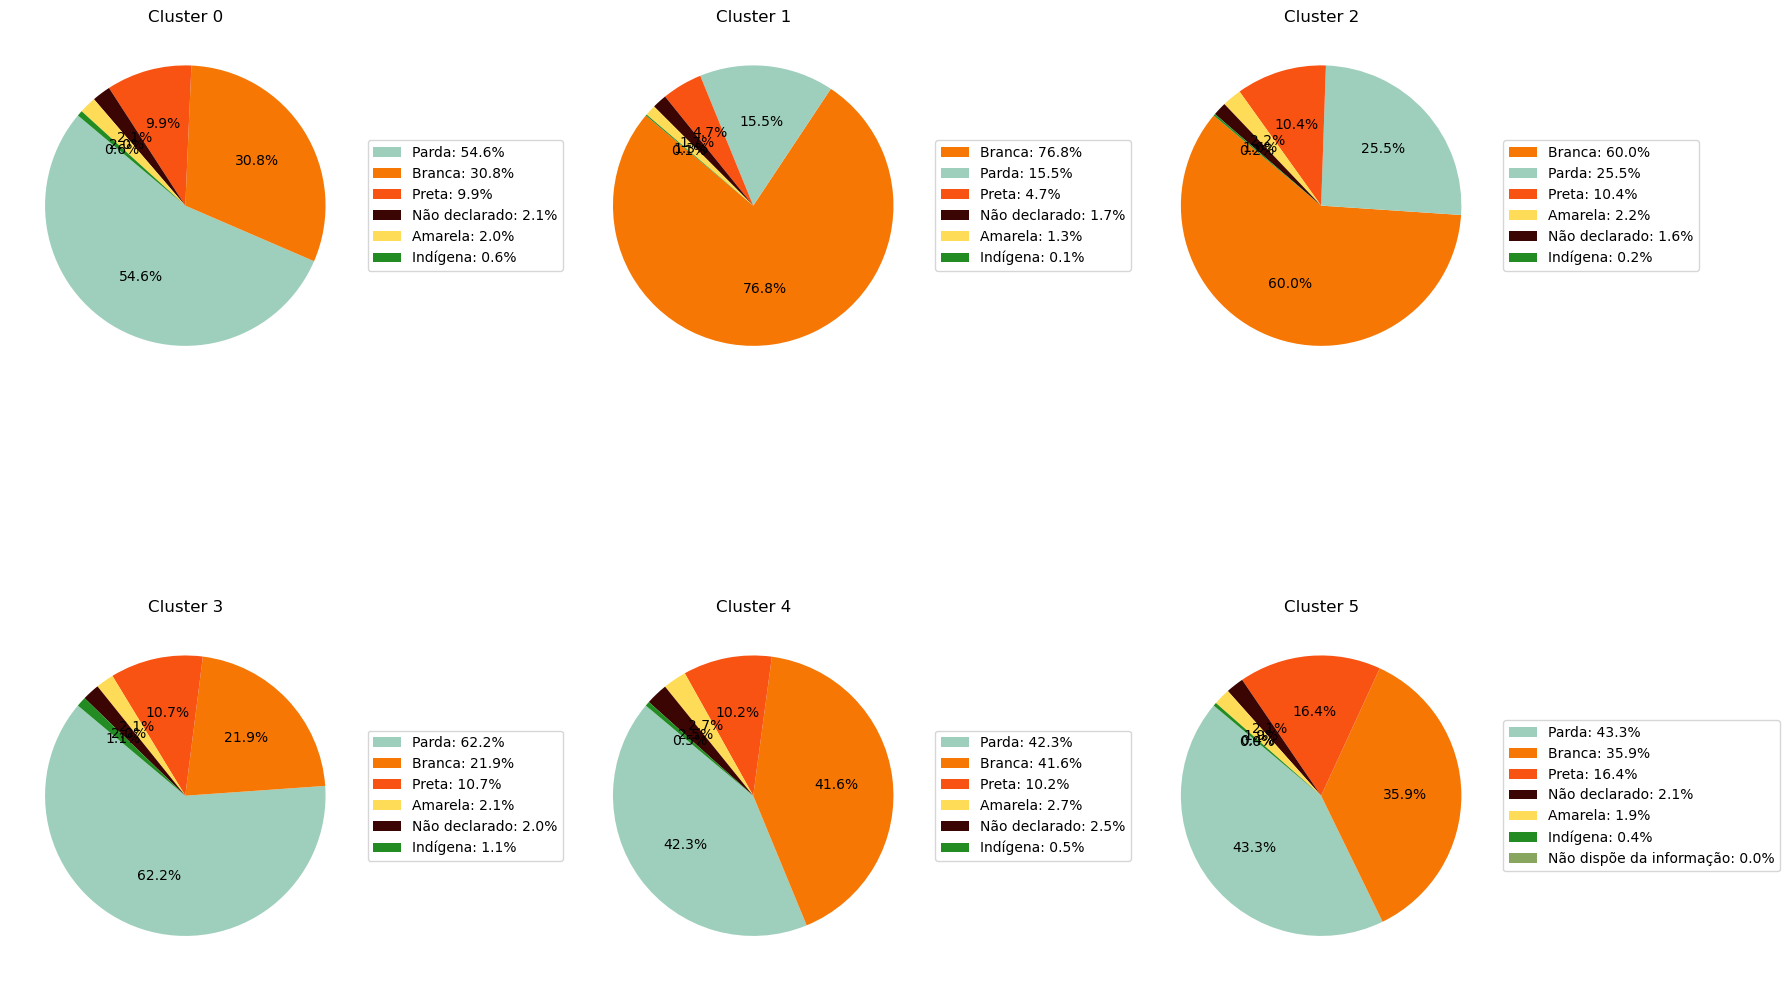

In [35]:
cores_fixas = {
    'Não declarado': '#3b0503', 
    'Branca': '#f67704',        
    'Preta': '#f85313',         
    'Parda': '#9ecfbc',         
    'Amarela': '#fedc57',       
    'Indígena': '#228B22',      
    'Não dispõe da informação': '#88a65e'
}

dicionarioCorRaca = {
    0: 'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena',
    6: 'Não dispõe da informação'
}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for cluster, ax in zip(range(0, 6), axes.flatten()):
    cluster_atual = microdadosEnem[microdadosEnem['K-Classes'] == cluster]
    cor_raca_counts = cluster_atual['TP_COR_RACA'].map(dicionarioCorRaca).value_counts()
    
    cores = [cores_fixas[cor_raca] for cor_raca in cor_raca_counts.index]
    
    wedges, texts, autotexts = ax.pie(cor_raca_counts, colors=cores, autopct='%1.1f%%', startangle=140)
    ax.set_title(f"Cluster {cluster}")
    
    legend_labels = [f'{cor_raca}: {percent:.1f}%' for cor_raca, percent in zip(cor_raca_counts.index, cor_raca_counts.values / cor_raca_counts.sum() * 100)]
    ax.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
    

plt.tight_layout()
plt.show()

#### Conclusões 3


CLUSTER 0
* Composto por candidatos que não foram bem em nenhuma prova quando comparados com a média global.
* Maior número de participantes se encaixa neste grupo.
* Esse grupo contém muitos jovens de 17 e 18 anos. No entanto, ele se diferencia por conter maior parte das pessoas que estão buscando uma segunda graduação.
* 54% Pardos
* 30% Brancos
* 9% Pretos
	
CLUSTER 1
* Composto por candidatos que possuem um ótimo desempenho em todas as provas quando comparados com a média global.
* Composto por um grupo restrito de pessoas.
* Há mais jovens de 17 anos neste grupo do que jovens de 18.
* 15% Pardos
* 76% Brancos
* 4% Pretos
	
CLUSTER 2
* Composto por candidatos que possuem a melhor média em todas as provas quando comparados com a média global
* Muitas pessoas fazem parte desse grupo
* A maior parte dos jovens entre 17 e 18 anos se encaixam neste grupo.
* 25% Pardos
* 60% Brancos
* 10% Pretos

CLUSTER 3
* Composto por candidatos que possuem a pior média em todas as provas quando comparados com a média global
* Poucas pessoas, a maior parte delas com perfil de 18 anos
* 62% Pardos
* 21% Brancos
* 10% Pretos

CLUSTER 4
* Composto pelos candidatos mais medianos quando comparados com a média global
* Menor número de pessoas
* 42% Pardos
* 41% Brancos
* 10% Pretos

CLUSTER 5
* Composto pelos candidatos que vão muito bem em redação e não tão bem nas demais provas quando comparados com a média global
* Muitas pessoas
* Esse grupo contém muitos jovens de 17 e 18 anos. No entanto, ele se diferencia por conter maior parte das pessoas que estão buscando uma requalificação profissional
* 43% Pardos
* 35% Brancos
* 16% Pretos

### Como estão divididas as rendas dos participantes dentro dos clusters?

<Figure size 1000x600 with 0 Axes>

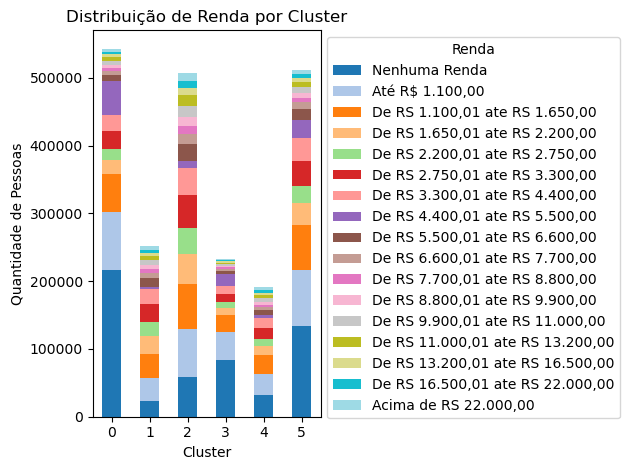

In [54]:
legenda_categorias_renda = {
    1: 'Nenhuma Renda',
    2: 'Até R$ 1.100,00',
    3: 'De RS 1.100,01 ate RS 1.650,00',
    4: 'De RS 1.650,01 ate RS 2.200,00',
    5: 'De RS 2.200,01 ate RS 2.750,00',
    6: 'De RS 2.750,01 ate RS 3.300,00',
    7: 'De RS 3.300,01 ate RS 4.400,00',
    8: 'De RS 4.400,01 ate RS 5.500,00',
    9: 'De RS 5.500,01 ate RS 6.600,00',
    10: 'De RS 6.600,01 ate RS 7.700,00',
    11: 'De RS 7.700,01 ate RS 8.800,00',
    12: 'De RS 8.800,01 ate RS 9.900,00',
    13: 'De RS 9.900,01 ate RS 11.000,00',
    14: 'De RS 11.000,01 ate RS 13.200,00',
    15: 'De RS 13.200,01 ate RS 16.500,00',
    16: 'De RS 16.500,01 ate RS 22.000,00',
    17: 'Acima de RS 22.000,00'
}

distribuicao_renda = microdadosEnem.groupby(['K-Classes', 'Q006']).size().unstack(fill_value=0)

# Adicionar a categoria '18' ao DataFrame, se não estiver presente
if 18 not in distribuicao_renda.columns:
    distribuicao_renda[18] = 0

# Reordenar as colunas do DataFrame de acordo com a ordem das categorias de renda
distribuicao_renda = distribuicao_renda[list(legenda_categorias_renda.keys())]

# Plotar o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
distribuicao_renda.plot(kind='bar', stacked=True, colormap='tab20')
plt.xlabel('Cluster')
plt.ylabel('Quantidade de Pessoas')
plt.title('Distribuição de Renda por Cluster')
plt.xticks(rotation=0)
plt.legend(title='Renda', labels=[legenda_categorias_renda[cat] for cat in distribuicao_renda.columns], bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#### Conclusões 4


CLUSTER 0
* Composto por candidatos que não foram bem em nenhuma prova quando comparados com a média global.
* Maior número de participantes se encaixa neste grupo.
* Esse grupo contém muitos jovens de 17 e 18 anos. No entanto, ele se diferencia por conter maior parte das pessoas que estão buscando uma segunda graduação.
* 54% Pardos
* 30% Brancos
* 9% Pretos
* Baixissima renda
	
CLUSTER 1
* Composto por candidatos que possuem um ótimo desempenho em todas as provas quando comparados com a média global.
* Composto por um grupo restrito de pessoas.
* Há mais jovens de 17 anos neste grupo do que jovens de 18.
* 15% Pardos
* 76% Brancos
* 4% Pretos
* Alta renda
	
CLUSTER 2
* Composto por candidatos que possuem a melhor média em todas as provas quando comparados com a média global
* Muitas pessoas fazem parte desse grupo
* A maior parte dos jovens entre 17 e 18 anos se encaixam neste grupo.
* 25% Pardos
* 60% Brancos
* 10% Pretos
* A maior renda

CLUSTER 3
* Composto por candidatos que possuem a pior média em todas as provas quando comparados com a média global
* Poucas pessoas, a maior parte delas com perfil de 18 anos
* 62% Pardos
* 21% Brancos
* 10% Pretos
* Média renda

CLUSTER 4
* Composto pelos candidatos mais medianos quando comparados com a média global
* Menor número de pessoas
* 42% Pardos
* 41% Brancos
* 10% Pretos
* Média renda

CLUSTER 5
* Composto pelos candidatos que vão muito bem em redação e não tão bem nas demais provas quando comparados com a média global
* Muitas pessoas
* Esse grupo contém muitos jovens de 17 e 18 anos. No entanto, ele se diferencia por conter maior parte das pessoas que estão buscando uma requalificação profissional
* 43% Pardos
* 35% Brancos
* 16% Pretos
* Baixa renda

Devido a natureza e ao proposito deste estudo, vou encerrar por aqui a análise dos clusters obtidos por meio do algoritmo K-Means. No entanto, é importante ressaltar que as possibilidades de exploração das relações dentro de cada cluster são virtualmente infinitas. Cada grupo pode ser investigado em profundidade para compreender as nuances das características que o compõem. A continuidade dessa análise poderia envolver investigações mais detalhadas das variáveis que contribuíram para a formação dos clusters, a exploração de interações complexas entre os atributos, a identificação de outliers e padrões não lineares, bem como a realização de análises de associação entre variáveis dentro de cada grupo.

## Conclusão

Neste trabalho, exploramos a clusterização da base de dados do ENEM 2021 utilizando o algoritmo K-Means. O objetivo principal era identificar padrões e agrupamentos nas características dos participantes do ENEM, buscando insights que pudessem contribuir para uma compreensão mais profunda das diferentes características socioeconômicas e educacionais dos estudantes.

Ao aplicar o algoritmo K-Means, conseguimos identificar seis clusters distintos que apresentam características específicas. Através da visualização gráfica, observamos a distribuição dos clusters em relação a variáveis como notas nas diferentes provas, raça e faixa etária. Essa análise permitiu a identificação de tendências e diferenças entre os grupos, fornecendo informações valiosas para a compreensão da diversidade da população de participantes do ENEM.

Além disso, foi possivel explorar várias técnicas diferentes de visualização gráfica e utliza-las de forma eficiente para observar detalhes específicos, como a distribuição de raça e renda em cada cluster. Essas visualizações enriqueceram nossa análise, permitindo uma compreensão mais completa dos padrões encontrados.

Em conclusão, a clusterização da base de dados do ENEM utilizando o algoritmo K-Means proporcionou uma análise aprofundada das características dos participantes, revelando grupos com características socioeconômicas e educacionais semelhantes. Esses resultados podem ser utilizados para direcionar políticas públicas, ações de inclusão e outras estratégias educacionais que considerem as particularidades e necessidades de cada grupo.

No entanto, ainda há diversas outras formas de se explorar esta base de dados. Para trabalhos futuros, sugere-se a aplicação de técnicas de aprendizado de máquina mais avançadas, como algoritmos de aprendizado profundo (deep learning), para identificar padrões ainda mais complexos e sutis nos dados. Além disso, é interessante considerar a incorporação de variáveis externas, como indicadores socioeconômicos e dados demográficos regionais, para enriquecer ainda mais a análise e a interpretação dos clusters.

Outra abordagem promissora seria a utilização de técnicas de análise de sentimento em redações e respostas abertas dos participantes do ENEM, permitindo compreender as percepções e opiniões dos estudantes sobre temas educacionais e sociais. Além disso, a exploração de análises de tendências temporais ao longo dos anos poderia fornecer insights sobre as mudanças nas características dos participantes e suas implicações.